# Capstone Project

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import warnings 
from sklearn.exceptions import ConvergenceWarning
# Filter warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Filter warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import time
notebook_start_time = time.time()


In [42]:
df = pd.read_json('data/loan_approval_dataset.json')

# EDA

In [43]:
df.head(15)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [45]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Income Percentage 

In [46]:
# Calculate the value counts of the 'Income' column and update the DataFrame inplace
df['Income'].value_counts().sort_index(ascending=False)


Income
9999938     1
9999400     1
9999180    36
9998280     1
9998070    34
           ..
11483       1
11430      37
11114      36
10675      37
10310      37
Name: count, Length: 41920, dtype: int64

In [47]:
# Assuming 'Income' is a numerical column in your DataFrame
# Create a new DataFrame with just the 'Income' column
df_income = pd.DataFrame(df['Income'])

# Categorize incomes into groups
df['Income_Group'] = pd.cut(df_income['Income'], bins=[0, 2000000, 4000000, 6000000, 8000000, 10000000],
                            labels=['0-1999999', '2000000-3999999', '4000000-5999999', '6000000-7999999', '8000000-9999999'])

# Display the DataFrame with the new column
df.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Group
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0-1999999
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,6000000-7999999
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,2000000-3999999
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,6000000-7999999
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4000000-5999999


In [48]:
df_income1 = df[(df['Income'] >= 8000000) & (df['Income'] < 9999999)]
df_income1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Group
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0,8000000-9999999
12,13,9120988,28,9,single,rented,no,Physician,Erode[17],Tamil_Nadu,9,12,0,8000000-9999999
13,14,8043880,57,12,single,rented,no,Financial_Analyst,Kollam,Kerala,8,10,0,8000000-9999999
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1,8000000-9999999
20,21,9225468,54,14,single,rented,no,Surveyor,Secunderabad,Telangana,8,10,0,8000000-9999999


In [49]:
df_income_per = pd.DataFrame(df['Income_Group'].value_counts(normalize=True)).reset_index()
df_income_per.columns=['Income_Group', 'Percentage']
display(df_income_per)
df_income_per.sort_values('Percentage', ascending=True, inplace=True)

,Income_Group,Percentage
0,6000000-7999999,0.203774
1,2000000-3999999,0.202238
2,0-1999999,0.199353
3,4000000-5999999,0.198627
4,8000000-9999999,0.196008


In [50]:
# Filter the DataFrame for rows where 'Risk_Flag' is 1
income_risk_1 = df[df['Risk_Flag'] == 1]

# Group by 'Income_Group' and calculate the percentage for each group
percentage_inc = (income_risk_1.groupby('Income_Group').size() / df.groupby('Income_Group').size()) * 100

# Print the percentages for each 'Income_Group'
for Income_group, percentage in percentage_inc.items():
    print(f"The percentage of people in the income group {Income_group} with Risk_Flag of 1 is: {percentage:.2f}%")


The percentage of people in the income group 0-1999999 with Risk_Flag of 1 is: 13.17%
The percentage of people in the income group 2000000-3999999 with Risk_Flag of 1 is: 11.51%
The percentage of people in the income group 4000000-5999999 with Risk_Flag of 1 is: 12.35%
The percentage of people in the income group 6000000-7999999 with Risk_Flag of 1 is: 11.79%
The percentage of people in the income group 8000000-9999999 with Risk_Flag of 1 is: 12.71%


In [51]:
# Filter the DataFrame for rows where 'Risk_Flag' is 0
income_risk_0 = df[df['Risk_Flag'] == 0]

# Group by 'Income_Group' and calculate the percentage for each group
percentage_inc_0 = (income_risk_0.groupby('Income_Group').size() / df.groupby('Income_Group').size()) * 100

# Print the percentages for each 'Income_Group'
for Income_group, percentage in percentage_inc_0.items():
    print(f"The percentage of people in the income group {Income_group} with Risk_Flag of 0 is: {percentage:.2f}%")


The percentage of people in the income group 0-1999999 with Risk_Flag of 0 is: 86.83%
The percentage of people in the income group 2000000-3999999 with Risk_Flag of 0 is: 88.49%
The percentage of people in the income group 4000000-5999999 with Risk_Flag of 0 is: 87.65%
The percentage of people in the income group 6000000-7999999 with Risk_Flag of 0 is: 88.21%
The percentage of people in the income group 8000000-9999999 with Risk_Flag of 0 is: 87.29%


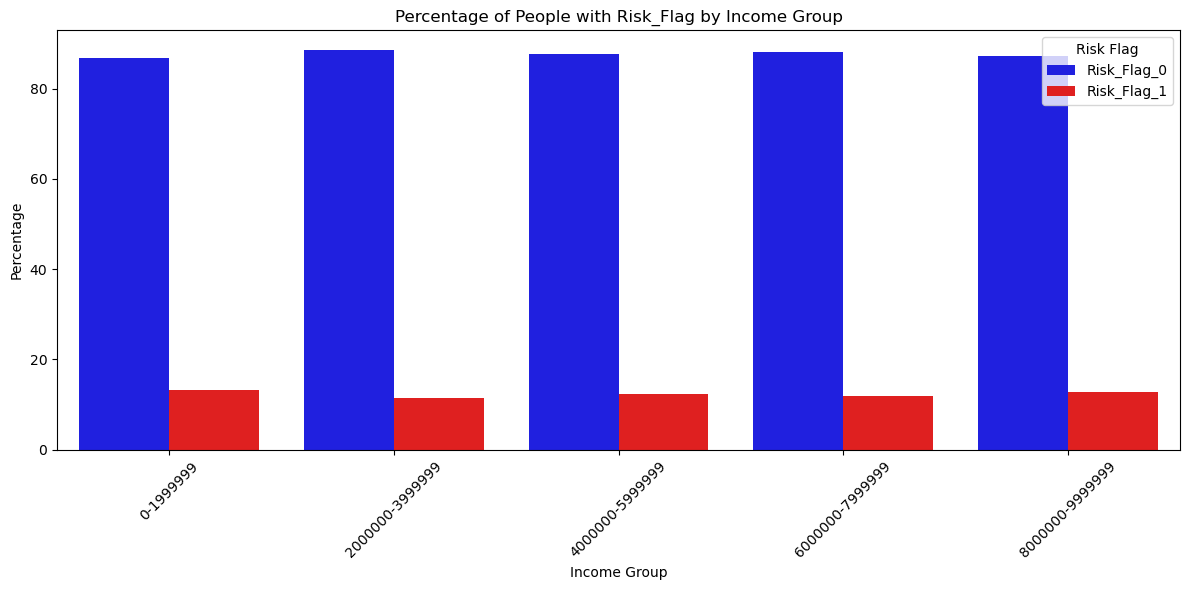

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a DataFrame for plotting
percentage_inc_df = pd.DataFrame({
    'Income_Group': percentage_inc_0.index,
    'Risk_Flag_0': percentage_inc_0.values,
    'Risk_Flag_1': percentage_inc.values
})

# Melt the DataFrame for Seaborn
percentage_inc_melted = percentage_inc_df.melt(id_vars='Income_Group', value_vars=['Risk_Flag_0', 'Risk_Flag_1'],
                                               var_name='Risk_Flag', value_name='Percentage')

# Define custom colors
custom_palette = {
    'Risk_Flag_0': 'blue',
    'Risk_Flag_1': 'red'
}

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_inc_melted, x='Income_Group', y='Percentage', hue='Risk_Flag', palette = custom_palette)

plt.xlabel('Income Group')
plt.ylabel('Percentage')
plt.title('Percentage of People with Risk_Flag by Income Group')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Age Percentage 

In [53]:
df['Age'].value_counts().sort_index()

Age
21    4205
22    4430
23    4322
24    4326
25    4543
26    4156
27    5197
28    3901
29    4109
30    4468
31    4257
32    3834
33    4921
34    4414
35    4643
36    3444
37    4153
38    3793
39    3800
40    4233
41    4827
42    4134
43    4206
44    3622
45    4806
46    3627
47    4483
48    4967
49    4203
50    4624
51    3397
52    3197
53    4490
54    4785
55    4563
56    4344
57    4394
58    4368
59    4498
60    4504
61    4235
62    4311
63    3942
64    4132
65    3969
66    5092
67    3995
68    4772
69    4617
70    4251
71    4150
72    4533
73    3569
74    3954
75    3829
76    4585
77    3916
78    4455
79    4505
Name: count, dtype: int64

In [54]:
df_agegroup = pd.DataFrame(df['Age'])

# Categorize ages by 10 years into a new column
df['Age_Group'] = pd.cut(df_agegroup['Age'], bins=range(20, 90, 10), labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

# Display the DataFrame with the new column
df.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Group,Age_Group
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0-1999999,20-29
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,6000000-7999999,30-39
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,2000000-3999999,60-69
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,6000000-7999999,40-49
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4000000-5999999,40-49


In [55]:
df_age1 = df[(df['Age'] >= 30) & (df['Age'] < 40)]
df_age1.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Group,Age_Group
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0,0-1999999,30-39
15,16,5694236,39,2,married,rented,yes,Economist,Anantapuram[24],Andhra_Pradesh,2,10,0,4000000-5999999,30-39
23,24,9236505,36,19,single,rented,no,Chemical_engineer,Ongole,Andhra_Pradesh,6,14,0,8000000-9999999,30-39
26,27,6063428,38,6,married,rented,no,Dentist,Ambattur,Tamil_Nadu,6,13,0,6000000-7999999,30-39
29,30,4386333,31,16,single,rented,no,Physician,Shimoga,Karnataka,3,12,0,4000000-5999999,30-39
43,44,8390825,30,11,single,rented,no,Secretary,Bidhannagar,West_Bengal,7,10,0,8000000-9999999,20-29
56,57,5554586,39,18,single,rented,no,Software_Developer,Hindupur,Andhra_Pradesh,13,13,1,4000000-5999999,30-39
66,67,4334000,36,4,single,rented,no,Politician,Berhampur,Odisha,4,11,0,4000000-5999999,30-39
76,77,2966907,30,6,married,rented,yes,Magistrate,Tiruppur,Tamil_Nadu,5,12,0,2000000-3999999,20-29
82,83,7433875,32,12,single,rented,yes,Fashion_Designer,Chennai,Tamil_Nadu,11,10,1,6000000-7999999,30-39


In [56]:
df_Age_per = pd.DataFrame(df['Age_Group'].value_counts(normalize=True)).reset_index()
df_Age_per.columns=['Age_Group', 'Percentage']
display(df_Age_per)
df_Age_per.sort_values('Percentage', ascending=True, inplace=True)

,Age_Group,Percentage
0,20-29,0.173242
1,40-49,0.172615
2,60-69,0.171889
3,50-59,0.168810
4,30-39,0.164651
5,70-79,0.148794


In [57]:
# Filter the DataFrame for rows where 'Risk_Flag' is 1
age_risk_1 = df[df['Risk_Flag'] == 1]

# Group by 'Age_Group' and calculate the percentage for each group
percentage_age = (age_risk_1.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100

# Print the percentages for each 'Age_Group'
for age_group, percentage in percentage_age.items():
    print(f"The percentage of people aged {age_group} with Risk_Flag of 1 is: {percentage:.2f}%")


The percentage of people aged 20-29 with Risk_Flag of 1 is: 14.47%
The percentage of people aged 30-39 with Risk_Flag of 1 is: 11.74%
The percentage of people aged 40-49 with Risk_Flag of 1 is: 12.03%
The percentage of people aged 50-59 with Risk_Flag of 1 is: 12.06%
The percentage of people aged 60-69 with Risk_Flag of 1 is: 11.54%
The percentage of people aged 70-79 with Risk_Flag of 1 is: 11.86%


In [58]:
# Filter the DataFrame for rows where 'Risk_Flag' is 0
age_risk_0 = df[df['Risk_Flag'] == 0]

# Group by 'Age_Group' and calculate the percentage for each group
percentage_age0 = (age_risk_0.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100

# Print the percentages for each 'Age_Group'
for age_group, percentage in percentage_age0.items():
    print(f"The percentage of people in the age group {age_group} with Risk_Flag of 0 is: {percentage:.2f}%")


The percentage of people in the age group 20-29 with Risk_Flag of 0 is: 85.53%
The percentage of people in the age group 30-39 with Risk_Flag of 0 is: 88.26%
The percentage of people in the age group 40-49 with Risk_Flag of 0 is: 87.97%
The percentage of people in the age group 50-59 with Risk_Flag of 0 is: 87.94%
The percentage of people in the age group 60-69 with Risk_Flag of 0 is: 88.46%
The percentage of people in the age group 70-79 with Risk_Flag of 0 is: 88.14%


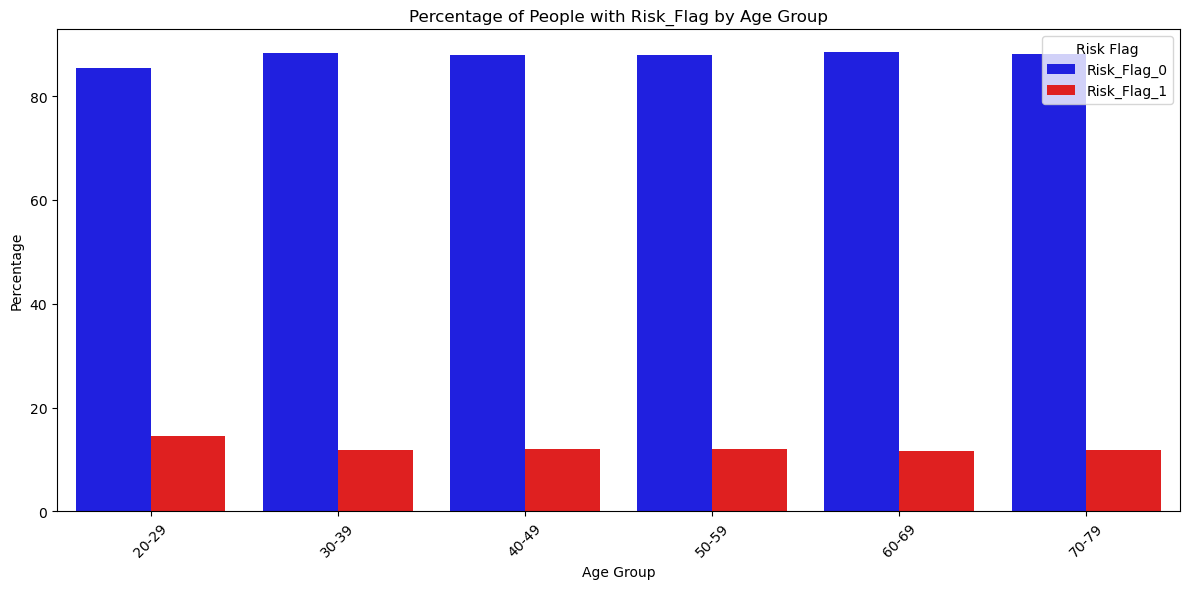

In [92]:

# Filter the DataFrame for rows where 'Risk_Flag' is 0 and 1
age_risk_0 = df[df['Risk_Flag'] == 0]
age_risk_1 = df[df['Risk_Flag'] == 1]

# Group by 'Age_Group' and calculate the percentage for each group
percentage_age_0 = (age_risk_0.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100
percentage_age_1 = (age_risk_1.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100

# Plot the percentages

# Create a DataFrame for plotting
percentage_age_df = pd.DataFrame({
    'Age_Group': percentage_age_0.index,
    'Risk_Flag_0': percentage_age_0.values,
    'Risk_Flag_1': percentage_age_1.values
})

# Melt the DataFrame for Seaborn
percentage_age_melted = percentage_age_df.melt(id_vars='Age_Group', value_vars=['Risk_Flag_0', 'Risk_Flag_1'],
                                               var_name='Risk_Flag', value_name='Percentage')

# Define custom colors
custom_palette = {
    'Risk_Flag_0': 'blue',
    'Risk_Flag_1': 'red'
}

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_age_melted, x='Age_Group', y='Percentage', hue='Risk_Flag', palette=custom_palette)

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of People with Risk_Flag by Age Group')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Experience 

In [84]:
df['Experience'].value_counts().sort_index()

Experience
0     11043
1     11575
2     11087
3     12069
4     11807
5     12441
6     13158
7     11232
8     11350
9     12936
10    12503
11    11449
12    12800
13    11713
14    12369
15    11993
16    12106
17    12131
18    12601
19    12287
20    11350
Name: count, dtype: int64

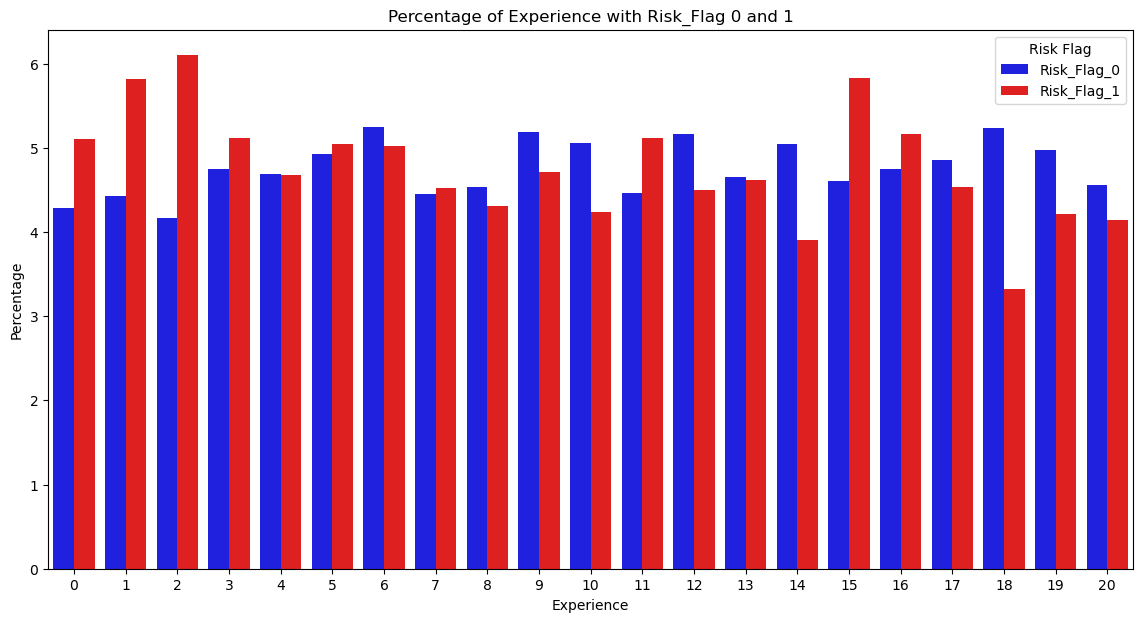

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
experience_counts_0 = df[df['Risk_Flag'] == 0]['Experience'].value_counts().sort_index()
experience_counts_1 = df[df['Risk_Flag'] == 1]['Experience'].value_counts().sort_index()

# Calculate percentages
experience_percent_0 = (experience_counts_0 / experience_counts_0.sum()) * 100
experience_percent_1 = (experience_counts_1 / experience_counts_1.sum()) * 100

# Create a DataFrame for plotting
experience_df = pd.DataFrame({
    'Experience': experience_percent_0.index,
    'Risk_Flag_0': experience_percent_0.values,
    'Risk_Flag_1': experience_percent_1.values
})

# Melt the DataFrame for Seaborn
experience_melted = experience_df.melt(id_vars='Experience', value_vars=['Risk_Flag_0', 'Risk_Flag_1'],
                                       var_name='Risk_Flag', value_name='Percentage')

# Define custom colors
custom_palette = {
    'Risk_Flag_0': 'blue',
    'Risk_Flag_1': 'red'
}

# Plotting with Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=experience_melted, x='Experience', y='Percentage', hue='Risk_Flag', palette=custom_palette)

plt.xlabel('Experience')
plt.ylabel('Percentage')
plt.title('Percentage of Experience with Risk_Flag 0 and 1')
plt.legend(title='Risk Flag')
plt.show()


# Married/Single Percentage

In [61]:
df['Married/Single'].value_counts()

Married/Single
single     226272
married     25728
Name: count, dtype: int64

In [62]:
df_Marr_Sing_Per = pd.DataFrame(df['Married/Single'].value_counts(normalize=True)).reset_index()
df_Marr_Sing_Per.columns=['Married/Single', 'Percentage']
display(df_Marr_Sing_Per)
df_Marr_Sing_Per.sort_values('Percentage', ascending=True, inplace=True)

,Married/Single,Percentage
0,single,0.897905
1,married,0.102095


In [63]:
import pandas as pd

# Assuming your dataset is stored in a variable called 'df'
# Filter the data for married people with Risk_Flag of 1
married_risk_1 = df[(df['Married/Single'] == 'married') & (df['Risk_Flag'] == 1)]
single_risk_1 = df[(df['Married/Single'] == 'single') & (df['Risk_Flag'] == 1)]


# Calculate the total number of married people
total_married = len(df[df['Married/Single'] == 'married'])
total_single = len(df[df['Married/Single'] == 'single'])


# Calculate the percentage
percentage_marr1 = (len(married_risk_1) / total_married) * 100
percentage_sing1 = (len(single_risk_1) / total_single) * 100

print(f"The percentage of married people with Risk_Flag of 1 is: {percentage_marr1:.2f}%")
print(f"The percentage of single people with Risk_Flag of 1 is: {percentage_sing1:.2f}%")

The percentage of married people with Risk_Flag of 1 is: 10.25%
The percentage of single people with Risk_Flag of 1 is: 12.53%


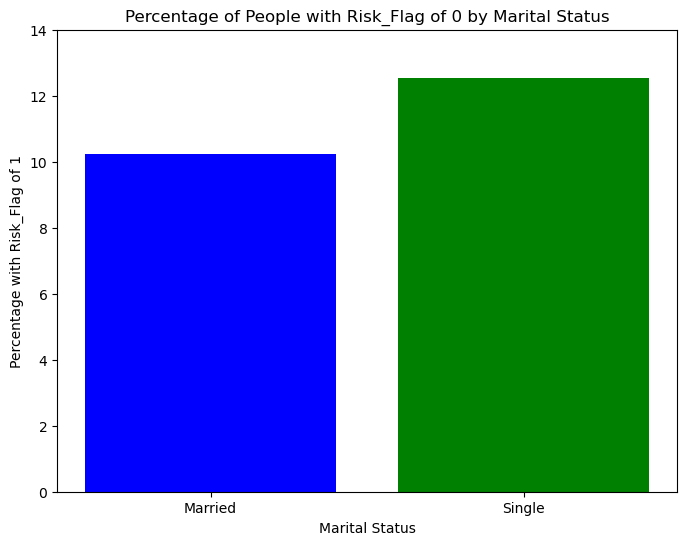

In [64]:
import matplotlib.pyplot as plt

# Calculate the percentages
percentages_marr_sing1 = [percentage_marr1, percentage_sing1]
labels = ['Married', 'Single']

# Plot the percentages
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages_marr_sing1, color=['blue', 'green'])
plt.xlabel('Marital Status')
plt.ylabel('Percentage with Risk_Flag of 1')
plt.title('Percentage of People with Risk_Flag of 0 by Marital Status')
plt.ylim(0, 14)
plt.show()


In [65]:
# Filter the data for married people with Risk_Flag of 0
married_risk_0 = df[(df['Married/Single'] == 'married') & (df['Risk_Flag'] == 0)]
single_risk_0 = df[(df['Married/Single'] == 'single') & (df['Risk_Flag'] == 0)]

# Calculate the total number of married and single people
total_married = len(df[df['Married/Single'] == 'married'])
total_single = len(df[df['Married/Single'] == 'single'])

# Calculate the percentage
percentage_marr0 = (len(married_risk_0) / total_married) * 100
percentage_sing0 = (len(single_risk_0) / total_single) * 100

print(f"The percentage of married people with Risk_Flag of 0 is: {percentage_marr0:.2f}%")
print(f"The percentage of single people with Risk_Flag of 0 is: {percentage_sing0:.2f}%")


The percentage of married people with Risk_Flag of 0 is: 89.75%
The percentage of single people with Risk_Flag of 0 is: 87.47%


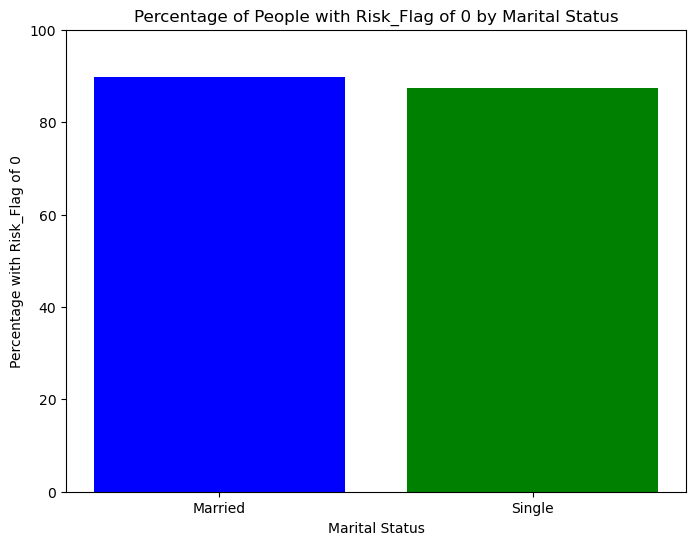

In [66]:
import matplotlib.pyplot as plt

# Calculate the percentages
percentages_marr_sing0 = [percentage_marr0, percentage_sing0]
labels = ['Married', 'Single']

# Plot the percentages
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages_marr_sing0, color=['blue', 'green'])
plt.xlabel('Marital Status')
plt.ylabel('Percentage with Risk_Flag of 0')
plt.title('Percentage of People with Risk_Flag of 0 by Marital Status')
plt.ylim(0, 100)
plt.show()


In [67]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Group,Age_Group
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0-1999999,20-29
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,6000000-7999999,30-39
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,2000000-3999999,60-69
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,6000000-7999999,40-49
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4000000-5999999,40-49


# Baseline Models

## Train/Test Data

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np


# Split data into features (X) and target variable (y)
X = df.drop(['Id','Risk_Flag'], axis=1)
y = df['Risk_Flag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Class Imbalance 

In [69]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

## Preprocessing

In [70]:
# Define preprocessing for numerical and categorical features
numeric_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
numeric_transformer = StandardScaler()

categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Income_Group', 'Age_Group']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Create a pipeline with preprocessing steps and your models
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(max_depth=5, random_state=3))])


# Fit the model
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE', 'Income_Group',
                                                   'Age_Group'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=3))])

## Logistic Regression/ Random Forest Baseline Model

In [71]:
from sklearn.metrics import classification_report
# Make predictions
lr_pred = pipeline_lr.predict(X_test)
rf_pred = pipeline_rf.predict(X_test)


# Print classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred, zero_division=0))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



## Logistic Regression/ Random Forest Using SMOTE

In [72]:
from imblearn.pipeline import Pipeline as imblearnPipeline
from imblearn.over_sampling import SMOTE

# Logistic Regression Pipeline with SMOTE
pipeline_lr_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))
])
# Random Forest Pipeline with SMOTE
pipeline_rf_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(max_depth=5, random_state=3))
])

# Fit the model with SMOTE
pipeline_lr_smote.fit(X_train, y_train)
pipeline_rf_smote.fit(X_train, y_train)

# Make predictions with the model using SMOTE
lr_smote_pred = pipeline_lr_smote.predict(X_test)
rf_smote_pred = pipeline_rf_smote.predict(X_test)


# Print classification report with SMOTE
print("\nLogistic Regression Classification Report with SMOTE:")
print(classification_report(y_test, lr_smote_pred, zero_division=0))
print("\nRandom Forest Classification Report with SMOTE:")
print(classification_report(y_test, rf_smote_pred, zero_division=0))



Logistic Regression Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400


Random Forest Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     44147
           1       0.17      0.60      0.26      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400



## Logistic Regression/ Random Forest GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

# Sample 20% of the training data for initial tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

# Define the parameter grid for logistic regression
param_grid_lr = [
    {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [1.0],
    'classifier__solver': ['saga'],
    'classifier__max_iter': [1800, 2000]
},
{
        'classifier__penalty': ['l2'],
        'classifier__C': [1.0],
        'classifier__solver': ['lbfgs'],
        'classifier__max_iter': [1800, 2000]
    }
]
# Define the parameter grid for random forest
param_grid_rf = param_grid_rf = {
    'classifier__n_estimators': [100, 200],  # Reduced upper limit to 200
    'classifier__max_depth': [10, 20],       # Removed None to prevent very deep trees
    'classifier__min_samples_split': [5, 10] # Focus on values that help prevent overfitting
}



# Create a GridSearchCV object for logistic regression and random forest
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train_sample, y_train_sample)
grid_search_rf.fit(X_train_sample, y_train_sample)



# Print the best parameters and the corresponding score
print("Best parameters found for Logistic Regression: ", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression: ", grid_search_lr.best_score_)
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest: ", grid_search_rf.best_score_)

# Extract best parameters
best_params_lr = grid_search_lr.best_params_
best_params_rf = grid_search_rf.best_params_

# Set best parameters for each pipeline
pipeline_lr.set_params(**best_params_lr)
pipeline_rf.set_params(**best_params_rf)


# Fit final models on the full training set
lrg_start_time = time.time()
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
lrg_end_time = time.time()
print("Logistic Regression and Random Forest on Full Training Set took {:.2f} seconds".format(lrg_end_time - lrg_start_time))

# Make predictions and evaluate
lr_pred = pipeline_lr.predict(X_test)
rf_pred = pipeline_rf.predict(X_test)



# Print classification reports
print("Logistic Regression Classification Report with GridSearchCV on Full Training Set:")
print(classification_report(y_test, lr_pred, zero_division=0))
print("Random Forest Classification Report with GridSearchCV on Full Training Set:")
print(classification_report(y_test, rf_pred, zero_division=0))

Best parameters found for Logistic Regression:  {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score for Logistic Regression:  0.4798358293974083
Best parameters found for Random Forest:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score for Random Forest:  0.47482639675888205
Logistic Regression and Random Forest on Full Training Set took 15.43 seconds
Logistic Regression Classification Report with GridSearchCV on Full Training Set:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400

Random Forest Classification Report with GridSearchCV on Full Training

## Logistic Regression/ Random Forest Using SMOTE and GridsearchCV

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as imblearnPipeline
from imblearn.over_sampling import SMOTE
import time

# Define the parameter grid for logistic regression
param_grid_lr = [
    {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [1.0],
        'classifier__solver': ['saga'],
        'classifier__max_iter': [1800, 2000]
    },
    {
        'classifier__penalty': ['l2'],
        'classifier__C': [1.0],
        'classifier__solver': ['lbfgs'],
        'classifier__max_iter': [1800, 2000]
    }
]

# Define the parameter grid for random forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [5, 10]
}

# Logistic Regression Pipeline with SMOTE and GridSearchCV
pipeline_lr_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))
])

# Random Forest Pipeline with SMOTE and GridSearchCV
pipeline_rf_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=3))
])

# Create GridSearchCV object for logistic regression and random forest with SMOTE
grid_search_lr_smote = GridSearchCV(pipeline_lr_smote, param_grid_lr, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_rf_smote = GridSearchCV(pipeline_rf_smote, param_grid_rf, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the logistic regression and random forest model with SMOTE and GridSearchCV
grid_search_lr_smote.fit(X_train_sample, y_train_sample)
grid_search_rf_smote.fit(X_train_sample, y_train_sample)

# Print the best parameters and the corresponding score for logistic regression and random forest with SMOTE
print("Best parameters found for Logistic Regression with SMOTE: ", grid_search_lr_smote.best_params_)
print("Best cross-validation score for Logistic Regression with SMOTE: ", grid_search_lr_smote.best_score_)
print("Best parameters found for Random Forest with SMOTE: ", grid_search_rf_smote.best_params_)
print("Best cross-validation score for Random Forest with SMOTE: ", grid_search_rf_smote.best_score_)

# Extract best parameters
best_params_lr = grid_search_lr_smote.best_params_
best_params_rf = grid_search_rf_smote.best_params_

# Set best parameters for each pipeline
pipeline_lr_smote.set_params(**best_params_lr)
pipeline_rf_smote.set_params(**best_params_rf)

# Fit final models on the full training set
lrgs_start_time = time.time()
pipeline_lr_smote.fit(X_train, y_train)
pipeline_rf_smote.fit(X_train, y_train)
lrgs_end_time = time.time()
print("Logistic Regression and Random Forest on Full Training Set took {:.2f} seconds".format(lrgs_end_time - lrgs_start_time))

# Make predictions with the best logistic regression and random forest model with SMOTE
lr_smote_grid_pred = pipeline_lr_smote.predict(X_test)
rf_smote_grid_pred = pipeline_rf_smote.predict(X_test)

# Print classification report for logistic regression and random forest with SMOTE and GridSearchCV
print("\nLogistic Regression Classification Report with SMOTE and GridSearchCV:")
print(classification_report(y_test, lr_smote_grid_pred, zero_division=0))
print("\nRandom Forest Classification Report with SMOTE and GridSearchCV:")
print(classification_report(y_test, rf_smote_grid_pred, zero_division=0))


Best parameters found for Logistic Regression with SMOTE:  {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best cross-validation score for Logistic Regression with SMOTE:  0.48340338455855786
Best parameters found for Random Forest with SMOTE:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score for Random Forest with SMOTE:  0.6633181000703314
Logistic Regression and Random Forest on Full Training Set took 285.70 seconds

Logistic Regression Classification Report with SMOTE and GridSearchCV:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.60      0.48     50400
weighted avg       0.82      0.58      0.65     50400


Random Forest Classification Report

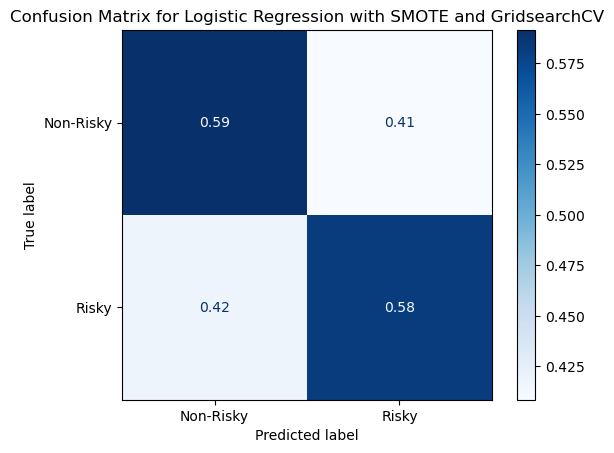

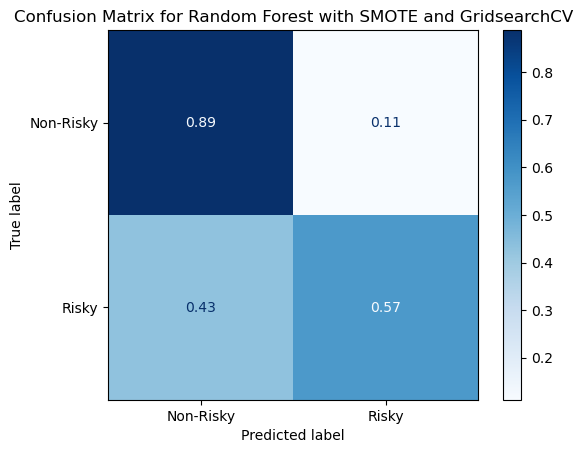

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix
cm = confusion_matrix(y_test, grid_search_lr_smote.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Non-Risky', 'Risky'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with SMOTE and GridsearchCV')
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_test, grid_search_rf_smote.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Non-Risky', 'Risky'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest with SMOTE and GridsearchCV')
plt.show()


# Important Features

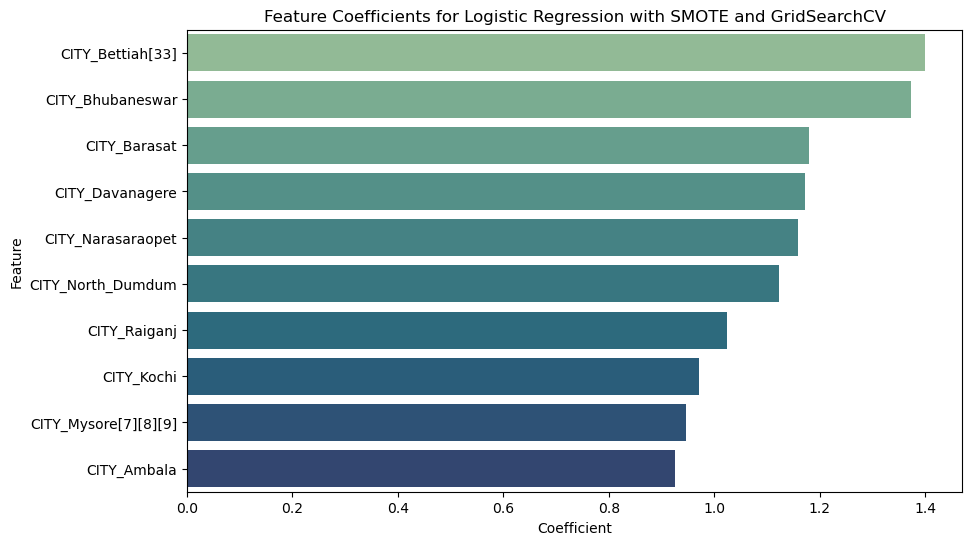

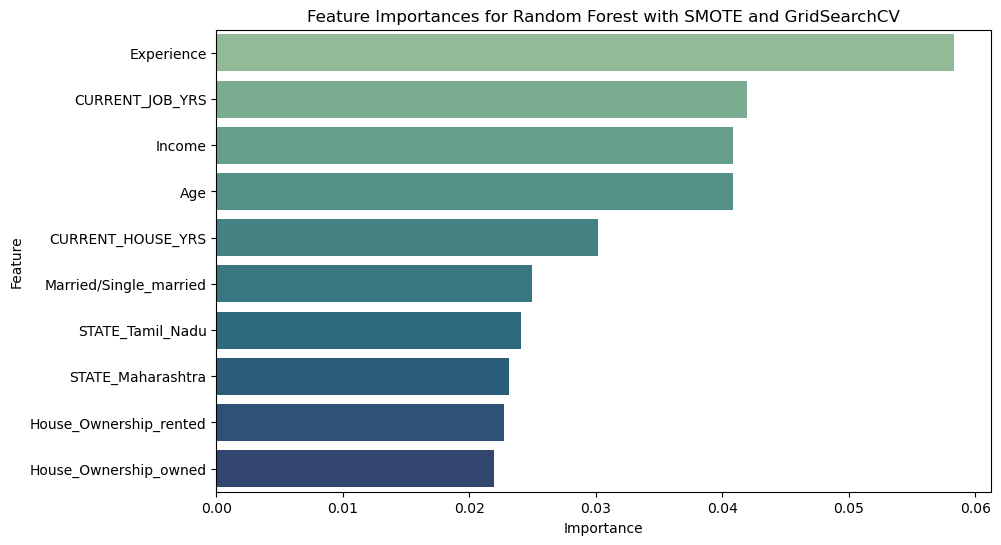

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_logistic_regression_coefficients(pipeline, n_features, title):
    """Function extracts logistic regression coefficients from a given pipeline object
    and displays top n_features."""
    # Extracting coefficients from the pipeline
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = np.concatenate(
        [preprocessor.named_transformers_['num'].feature_names_in_, 
         preprocessor.named_transformers_['cat'].get_feature_names_out()]
    )
    coefficients = pipeline.named_steps['classifier'].coef_[0]
    
    # Creating DataFrame for coefficients
    importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    
    # Sorting to find top n_features
    feature_importance = importance_df.reindex(coefficients.argsort()[::-1]).head(n_features)
    
    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance, hue='Feature', dodge=False, palette='crest', legend=False)
    plt.title(f'Feature Coefficients for {title}')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.show()

def plot_random_forest_feature_importances(pipeline, n_features, title):
    """Function extracts feature importances from a given random forest pipeline object
    and displays top n_features."""
    # Extracting feature importances from the pipeline
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = np.concatenate(
        [preprocessor.named_transformers_['num'].feature_names_in_, 
         preprocessor.named_transformers_['cat'].get_feature_names_out()]
    )
    importances = pipeline.named_steps['classifier'].feature_importances_
    
    # Creating DataFrame for feature importances
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    
    # Sorting to find top n_features
    feature_importance = importance_df.reindex(importances.argsort()[::-1]).head(n_features)
    
    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', dodge=False, palette='crest', legend=False)
    plt.title(f'Feature Importances for {title}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Number of top features to display
n_features = 10

# Plotting logistic regression coefficients
plot_logistic_regression_coefficients(grid_search_lr_smote.best_estimator_, n_features, 'Logistic Regression with SMOTE and GridSearchCV')

# Plotting random forest feature importances
plot_random_forest_feature_importances(grid_search_rf_smote.best_estimator_, n_features, 'Random Forest with SMOTE and GridSearchCV')


# Gradient Boost XGBoost Using SMOTE and GridsearchCV Model

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as imblearnPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
import time

# Define the highly focused parameter grid for XGBoost
param_grid_xgb = {
    'classifier__max_depth': [3, 6],         # Reduced values to limit complexity
    'classifier__learning_rate': [0.1, 0.3], # Removed smaller learning rates for quicker convergence
    'classifier__subsample': [0.8, 1.0]      # Kept subsample range to maintain robustness
}

# XGBoost Pipeline with SMOTE
pipeline_xgb_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(n_estimators=150, random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Create GridSearchCV object for XGBoost with SMOTE
grid_search_xgb_smote = GridSearchCV(pipeline_xgb_smote, param_grid_xgb, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the XGBoost model with SMOTE and GridSearchCV
grid_search_xgb_smote.fit(X_train_sample, y_train_sample)

# Print the best parameters and the corresponding score
print("Best parameters found for XGBoost with SMOTE: ", grid_search_xgb_smote.best_params_)
print("Best cross-validation score for XGBoost with SMOTE: ", grid_search_xgb_smote.best_score_)

# Extract best parameters
best_params_xgb = grid_search_xgb_smote.best_params_

# Set best parameters for the pipeline
pipeline_xgb_smote.set_params(**best_params_xgb)

# Fit final model on the full training set
xg_start_time = time.time()
pipeline_xgb_smote.fit(X_train, y_train)
xg_end_time = time.time()
print("XGBoost with Gridsearch and SMOTE on Full Training Set took {:.2f} seconds".format(xg_end_time - xg_start_time))

# Make predictions with the best XGBoost model with SMOTE
xgb_smote_grid_pred = pipeline_xgb_smote.predict(X_test)

# Print classification report with SMOTE and GridSearchCV
print("\nXGBoost Classification Report with SMOTE and GridSearchCV:")
print(classification_report(y_test, xgb_smote_grid_pred, zero_division=0))


Best parameters found for XGBoost with SMOTE:  {'classifier__learning_rate': 0.3, 'classifier__max_depth': 6, 'classifier__subsample': 0.8}
Best cross-validation score for XGBoost with SMOTE:  0.5946354883302709
XGBoost with Gridsearch and SMOTE on Full Training Set took 19.45 seconds

XGBoost Classification Report with SMOTE and GridSearchCV:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     44147
           1       0.38      0.63      0.48      6253

    accuracy                           0.83     50400
   macro avg       0.66      0.74      0.69     50400
weighted avg       0.87      0.83      0.85     50400



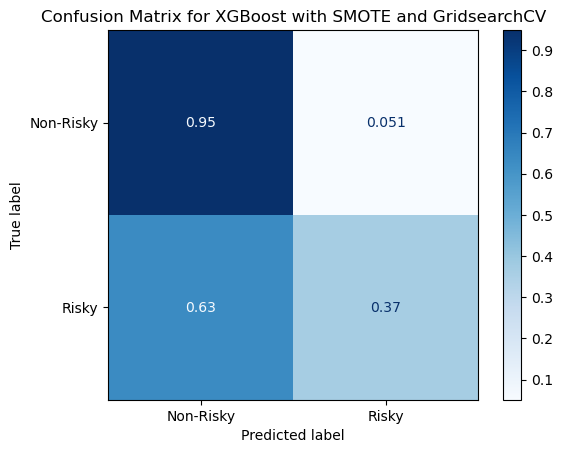

In [78]:
# Generate confusion matrix
cm = confusion_matrix(y_test, grid_search_xgb_smote.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Non-Risky', 'Risky'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost with SMOTE and GridsearchCV')
plt.show()


In [79]:
notebook_end_time = time.time()
total_time = notebook_end_time - notebook_start_time

print(f"Total runtime of the notebook: {total_time:.2f} seconds")


Total runtime of the notebook: 465.42 seconds
